# <u>Vorbereitung</u>

* a) $ e^{j\omega t}$
* b) $\int f(x)  dx$
* c) Darstellung der mit $\omega$ parametriesierten Funktion

### 2.) Darstellung der Exponentialfunktion:

* <b>a)</b> importieren der Bibliotheken:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

* <b>b)</b> erstellen der Exponentialfunktion:
* auf Grund der großen Zeitspanne mit einer sehr geringen Frequenz !

In [2]:
n=500
t=np.linspace(-5,5,n)
f=0.3
omega=2*np.pi*f
im=np.sin(omega*t)
re=np.cos(omega*t)

* <b>c)</b> Plott:

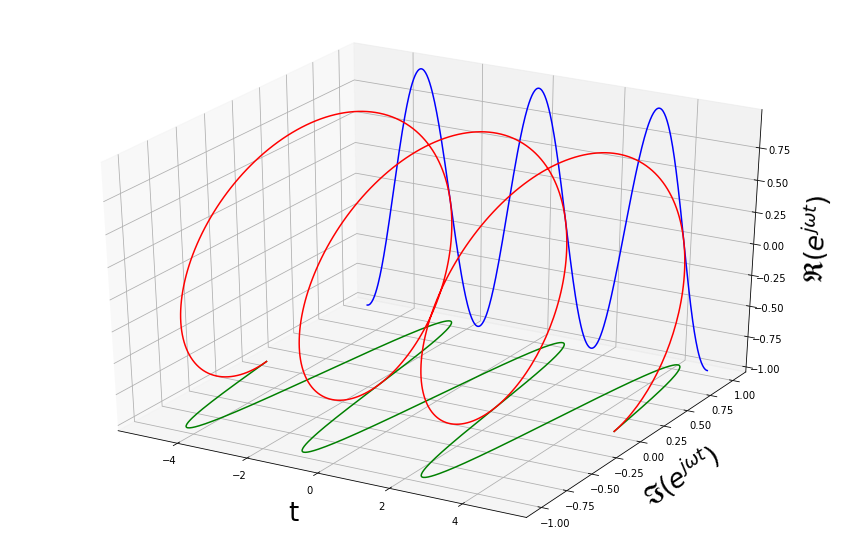

In [3]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot3D(t,im,-np.ones(n), "green")
ax.plot3D(t,np.ones(n),re, "blue")
ax.plot3D(t,im,re, "red")
ax.set_xlabel('t', size="26", labelpad=15)
ax.set_ylabel('$\mathfrak{I}$($ e^{j\omega t}$)',size="26", labelpad=15)
ax.set_zlabel('$\mathfrak{R}$($ e^{j\omega t}$)',size="26", labelpad=15);

## 3.) <u>Numerische Lösung von Integralen:</u>

#### * Plottfunktion:

In [4]:
def createPlot(xAxis ,function, title, xlabel, stepsx, ylabel, stepsy):
    plt.plot(xAxis,function)
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.linspace(xAxis[0],xAxis[-1],stepsx))
    if stepsy!=0:
        plt.yticks(np.linspace(function[0],function[-1],stepsy))

#### * Erstellen einer Sinus-Funktion $f(t)=sin(2 \pi* 100 *t)+2$  :

In [5]:
n=200
f=10
omega=2*np.pi*f
t2_start=0
t2_end=1
t2=np.linspace(t2_start,t2_end,n)

f_t=np.sin(omega*t2)+2

#### * Erstellen der Stammfuntion durch Aufleiten $F(t) = \frac{-cos(2 \pi * f * t)}{2 \pi * f}+2t$  :

In [6]:
F_t=-np.cos(2*np.pi*f*t2)/(2*np.pi*f)+2*t2

#### * Darstellungen:

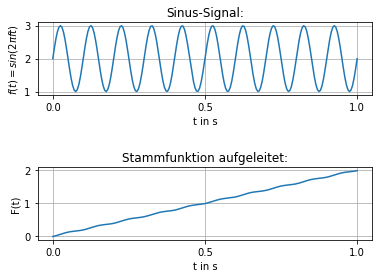

In [7]:
plt.subplot(2,1,1)
createPlot(t2,f_t,"Sinus-Signal:","t in s",3,"$f(t) = sin(2 \pi f t)$",0)
plt.subplot(2,1,2)
plt.subplots_adjust(hspace=1)
createPlot(t2,F_t,"Stammfunktion aufgeleitet:","t in s",3,"F(t)",0)

#### * (Zusatz) Erstellen einer Rechteckfunktion $r(t)=2\Pi(t-T)$ mit $T=8$:

In [8]:
n2=1024
T=8
amp=2
rect_t=np.zeros(n2)
t_start=-4
t_end=16
t3=np.linspace(t_start,t_end,n2)
for i in range(0,n2):
    if t3[i]>=T-T/2 and t3[i]<=T+T/2:
        rect_t[i]=amp

#### * (Zusatz) Entwurfsversuch einer Stammfunktion :
* da die funktion im "aktiven" Bereich konstant ist, sollte die Stammfunktion in diesem Bereich eine lineare Steigung
    von 0 auf 16 (Gesamtfläche) darstellen! Da die Funktion verschoben ist, muss die Integrationskonstante beachtet werden.

In [9]:
R_t=np.zeros(n2)
for i in range(0,n2):
    if t3[i]>=T-T/2 and t3[i]<=T+T/2:
        R_t[i]=rect_t[i]*t3[i]-T
    elif t3[i]>T+T/2:
        R_t[i]=T*amp
    

#### * (Zusatz) Darstellungen:

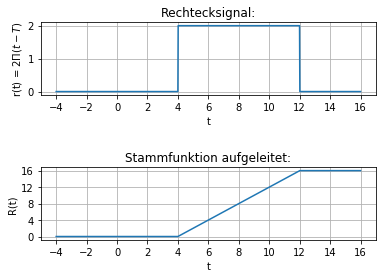

In [10]:
plt.subplot(2,1,1)
createPlot(t3,rect_t,"Rechtecksignal:","t",11,"r(t) = $2 \Pi(t-T)$",0)
plt.subplot(2,1,2)
plt.subplots_adjust(hspace=1)
createPlot(t3,R_t,"Stammfunktion aufgeleitet:","t",11,"R(t)",5)

### <u>Numerische Berechnungen der Stammfunktionen:</u>

#### * Numerische Stammfunktion der Sinus-Funktion $\sum_i{f(t_i)} \Delta t$:

In [11]:
def stamm(f,start, end,N):
    dt=(end-start)/N
    F=np.zeros(N)
    F[0]=f[0]*dt
    for k in range(1,N):
        F[k]=(F[k-1]+f[k-1]*dt)
    return F

In [12]:
F_t=stamm(f_t,t2_start,t2_end,n)


#### * Darstellung der Stammfunktion der Sinusfunktion mit aufsummierten Teilabschnitten:


Integral(f_t)= 2.0000000000000013


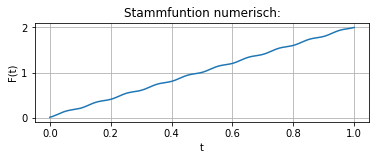

In [13]:
print( "Integral(f_t)=" ,F_t[n-1])
plt.subplot(2,1,1)
createPlot(t2,F_t,"Stammfuntion numerisch:","t",6,"F(t)",0)

* Diese Darstellung ist sehr ähnlich der aufgeleiteten Stammfunktion weiter oben und das Ergebnis des Integrals ist ungefähr gleich 2. Die sehr geringen Abweichungen sind auf die Rechnung mit Fließkommazahlen zurückzuführen und als irrelevant zu betrachten ! --aproximationsfehler

#### * (Zusatz) Stammfunktion der Rechteckfunktion

In [14]:
J=stamm(rect_t,t_start, t_end,n2)

#### *(Zusatz) Darstellung der Stammfunktion der Rechteckfunktion mit aufsummierten Teilabschnitten: $\sum_i{r(t_i)} \Delta t$

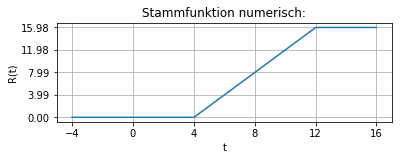

In [15]:
plt.subplot(2,1,1)
createPlot(t3,J,"Stammfunktion numerisch:","t",6,"R(t)",5)

* auch hier entspricht die summierte Version, der errechneten Stammfunktion oben, die Gesamtfläche ist 16 und entspricht daher auch der einfachen Rechnung Höhe * Breite des Rechtecks (2*8)

### FFT der Funktionen:

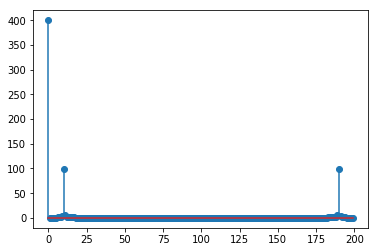

In [16]:
FFt=np.fft.fft(f_t)
plt.stem(abs(FFt));

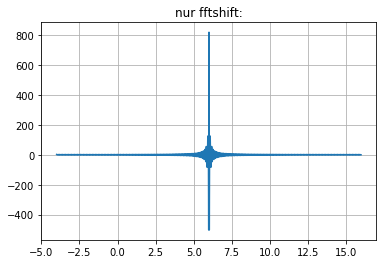

In [17]:
FT=np.fft.fft(rect_t)
FT2=np.fft.fftshift(FT)
plt.plot(t3,np.real(FT2))
plt.grid(True)
plt.title("nur fftshift:");


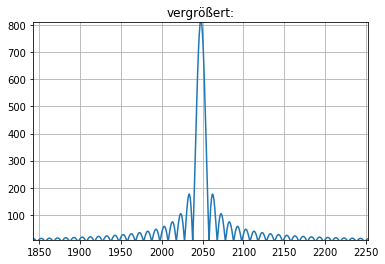

In [18]:
FT=np.fft.fft(rect_t,4096)
FT2=np.fft.fftshift(FT)
plt.plot(abs(FT2))
plt.margins(x=-0.45,y=-0.01)
plt.grid(True)
plt.title("vergrößert:");